Distribution de temps de séjour dans un réacteur continu



Un réacteur chimique peut fonctionner en mode discontinu ou en mode continu. Dans le premier cas, on mélange les réactifs dans un récipient, par exemple un Bécher en TP. Après réaction, le(s) produit(s) se trouve(nt) dans le même récipient avec éventuellement des réactifs qui n'ont pas réagi. Un réacteur continu est ouvert et traversé par un écoulement de fluide. Les réactifs sont injectés en entrée, ils réagissent au cours de leur voyage à travers le réacteur, et les produits et réactifs qui n'ont pas réagi sont éjectés en sortie. Pensez par exemple à un réacteur d'avion.

Dans les réacteurs continus, il est crucial de bien maîtriser la vitesse de l'écoulement en fonction de la vitesse de la réaction.  Prenons un cas très simplifié : si les réactifs traversent le réacteur en 1 seconde à cause d'un écoulement rapide, mais que la réaction prend 10 secondes pour s'activer, alors les réactifs vont ressortir avant d'avoir réagi. A l'inverse, si l'écoulement est très lent et que les réactifs traversent le réacteur en 100 secondes, la réaction se produira 10 secondes après leur entrée et les produits vont circuler dans le réacteur pendant 90 secondes inutilement. Il est donc important de bien adapter la vitesse de l'écoulement au temps de réaction.

Dans cet exemple simplifié, on pourrait se dire "il suffit de régler l'écoulement pour que le temps de séjour des réactifs soit égal au temps de réaction, soit 10 secondes", et ce serait vrai. Mais la réalité est plus complexe. Dans un réacteur continu, toutes les molécules de fluide (y compris les réactifs) ne traversent pas le réacteur à la même vitesse notamment à cause de la forme de l'écoulement (zones rapides ou lentes) et de la turbulence. Pour un temps de séjour moyen de 10 secondes, certaines molécules vont suivre des chemin préférentiels, portées par des écoulements rapides, et sortir en 2 secondes, et d'autres vont se retrouver piégées dans des recoins sans écoulement puis s'échapper après des temps beaucoup plus longs, par exemple 60 secondes. On parle d'une  "distribution de temps de séjour (DTS)", puisque les temps de séjour observés pour différentes molécules entrant dans le réacteur simultanément se distribuent entre 2 s et 60 s ici.

Il est important de connaître la DTS d'un réacteur continu, car on voit qu'une partie des molécules (le plus rapides) risquent de ne pas avoir le temps de réagir. Pour mesurer la DTS, on travaille sans réaction. On injecte une molécule 'marqueur' en entrée (un colorant par exemple) à $t=0$ et on mesure la concentration en sortie au cours du temps $C(t)$.

Le fichier data.csv contient une telle mesure avec $t$ en $s$ et $C$ en $mol/m^3$.

1. Lisez les données du fichier data.csv et stockez le temps et la concentration dans des tableaux numpy $t$ et $C$.

2. Tracez la courbe $C(t)$ avec des labels sur les axes et une légende.

Nous allons utiliser le modèle de DTS appelé "écoulement piston avec dispersion axiale" : on suppose que les molécules avancent en suivant un écoulement avec une vitesse uniforme $U$, et qu'elles ont aussi un mouvement aléatoire en plus qui leut permet d'aller un peu plus vite ou un peu moins vite que la vitesse de l'écoulement moyen. Ce mouvement aléatoire est appelé "diffusion".

Pour caractériser l'intensité de la diffusion, on utilise le nombre de Péclet noté $Pe$ : il représente le rapport entre la vitesse moyenne de l'écoulement $U$ et une vitesse induite par le mouvmement aléatoire qui lui est superposé. Si $Pe=1$, la diffusion induit des vitesses comparables à l'écoulement. Si $Pe\rightarrow\infty$, la diffusion est négligeable. Si $Pe\rightarrow0$ la vitesse $U$ est négligeable par rapport à la diffusion.

Dans ce modèle la fonction appelée "distribution de temps de séjour" $E(t)$ s'écrit
$$E(t)=\sqrt{\frac{Pe}{4\pi\tau t}}exp\left[-Pe\frac{(t-\tau)^2}{4\tau t}\right],$$
avec $\tau=L/U$ le temps caractéristique moyen que passe le fluide portant les réactifs dans le réacteur et $L$ la longueur du réacteur.

3. Définissez une fonction python $E(t,tau,Pe)$ qui renvoie la valeur de $E$ pour un tableau de temps $t$, et pour deux constantes tau et Pe. Tracez $E$ pour $t$ compris entre 0.001 et 40 secondes, contenant 1000 valeurs, et pour tau=10 s et Pe = 20, avec labels sur les axes et legende.

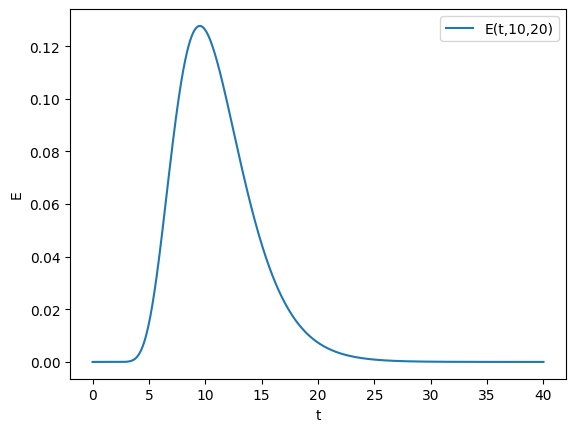

In [ ]:
from pylab import *
t = linspace(0.001,40,1000)
def E(t,tau,Pe):
  return sqrt(Pe/(4*pi*tau*t))*exp(-Pe*(t-tau)**2/(4*tau*t))

plot(t,E(t,10,20),label='E(t,10,20)')
xlabel('t')
ylabel('E')
legend()

4. Tracez la DTS pour tau=10 et les valeurs de Pe égales à 2, 8, 20, et 100 sur un même graphe, avec labels et légende.

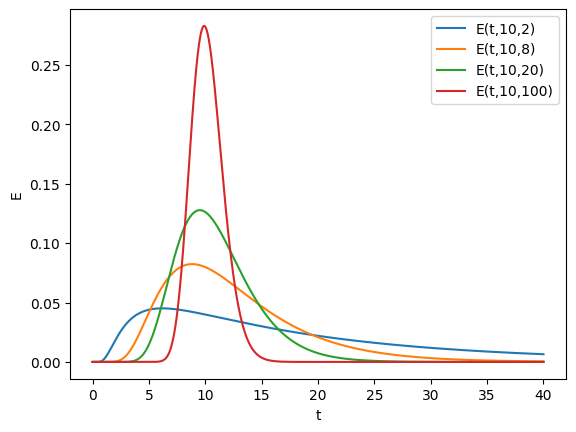

In [ ]:
Pe_ = [2, 8, 20, 100]
for Pe in Pe_:
  plot(t,E(t,10,Pe),label='E(t,10,'+str(Pe)+')')
xlabel('t')
ylabel('E')
legend()

5. Tracez la DTS pour Pe=20 et les valeurs de tau égales à 2, 5, 10, 15, 20 sur un même graphe, avec labels et légende.

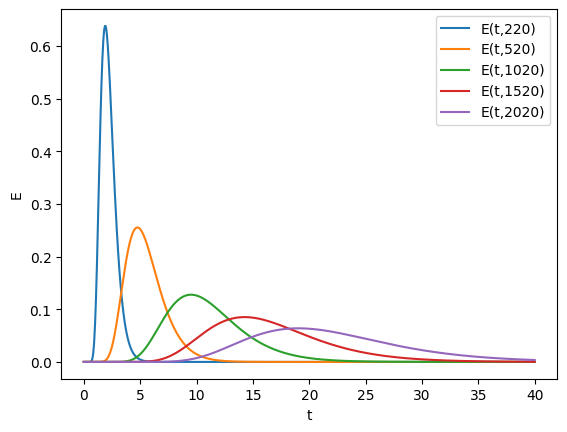

In [ ]:
tau_ = [2, 5, 10, 15, 20]
for tau in tau_:
  plot(t,E(t,tau,20),label='E(t,'+str(tau)+'20)')
xlabel('t')
ylabel('E')
legend()

Vous avez dû remarquer que $Pe$ joue sur la dyssémétrie du pic et que $\tau$ joue beaucoup sur le temps moyen de sortie.

Dans la suite du projet, les différentes questions vont vous aider à modéliser le réacteur expérimental en déterminant sa meilleure représentation possible par un réacteur piston-dispersion.

Pour ceci, il est d'abord nécessaire de transformer la mesure de concentration en sortie $C(t)$ en une mesure de distribution de temps de séjour expérimentale $E_\text{exp}(t)$ grâce à la relation
$$E_\text{exp}(t)=C(t)/m,$$
où $m$ est la masse totale qui traverse le réacteur et calculable avec
$$m=\int_{t=0}^\infty C(t)dt$$

6. Calculez la masse expérimentale $m$ et définnissez la DTS mesurée expérimentalent $E_\text{exp}(t)$, et tracez cette dernier avec labels et légende.

La masse totale est m= 126.447 g


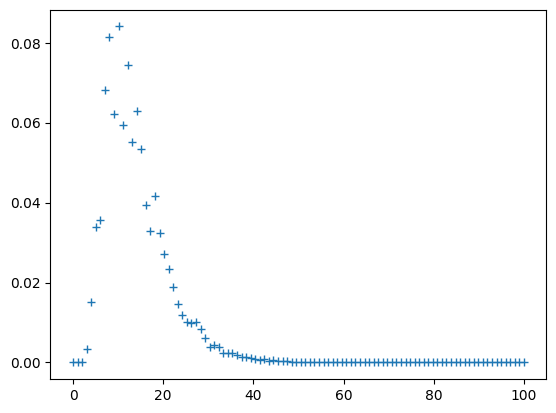

In [ ]:
texp = linspace(0.001,100,100)
C = E(texp, 11.11, 7.777) * (1+0.5*(rand(len(texp))-0.5)) * 124

from scipy.integrate import simpson
m = simpson(C,x=texp)
print(f"La masse totale est m={m:8.3f} g")

Eexp = C/m
plot(texp, Eexp, '+')

Il existe différentes manières de construire un modèle se rapprochant de ces mesures expérimentales. La première est de calculer directement des valeurs pour les paramètres $\tau$ et $Pe$ à partir des "moments" de $C$. Parmi les moments qui vont nous intéresser on trouve d'abord le moment d'ordre 1, qui est égal au temps de séjour moyen $\tau$ :
$$\tau_\text{exp}=\int_{t=0}^\infty tE_\text{exp}(t)dt.$$
Ce paramètre est représentatif de la position du pic (mais pas exactement égale à la position du pic). Le second moment utilisable est le moment d'ordre 2, qui est la variance $\sigma^2$ associée au pic. Rappel : $\sigma$ est l'écart-type, soit une mesure de la largeur du pic. On a  
$$\sigma_\text{exp}^2=\int_{t=0}^\infty (t-\tau)^2E_\text{exp}(t)dt.$$

7. Calculez $\tau_\text{exp}$ et $\sigma_\text{exp}^2$.

In [ ]:
tau_exp = simpson(texp*Eexp, texp)
sigma2_exp= simpson((texp-tau_exp)**2*Eexp, texp)

print(f"tau = {tau_exp} s")
print(f"sigma2 = {sigma2_exp} s")

tau = 13.880817506396957 s
sigma2 = 48.34464217616882 s


Le paramètre $\tau_\text{exp}$ calculé ci-dessus peut être utilisé directement dans le modèle $E(t,tau,Pe)$, mais il vous manque la valeur de $Pe$. Elle peut aussi être estimée en utilisant la relation
$$\sigma_\text{exp}^2=\tau_\text{exp}^2\left(2/Pe_\text{exp} + 8/Pe_\text{exp}^2\right)$$

8. Résolvez cette équation pour trouver la valeur $Pe_\text{exp}$.

In [ ]:
from scipy.optimize import fsolve
def f(Pe):
  return tau_exp**2*(2/Pe + 8/Pe**2) - sigma2_exp
Pe_exp = fsolve(f, 1)[0]
print(f"Pe = {Pe_exp}")

Pe = 10.896933747053536


9. Utilisez maintenant les valeurs de $\tau_\text{exp}$ et $Pe_\text{exp}$ avec la fonction $E$ obtenir un modèle E_moments de votre réacteur. Tracez sur un même graphe la DTS expérimentale et ce modèle E_moments, avec labels et légende.

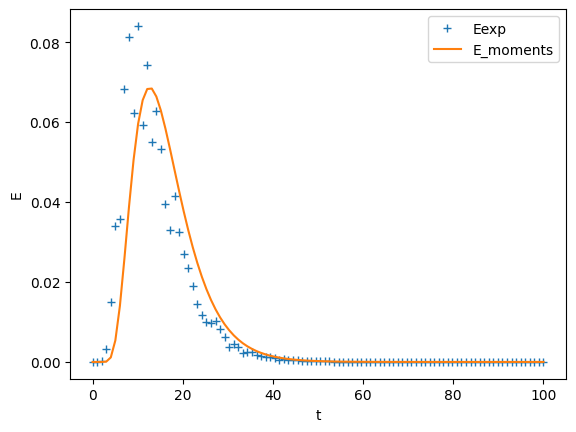

In [ ]:
E_moments=E(texp,tau_exp,Pe_exp)
plot(texp, Eexp, '+', label='Eexp')
plot(texp, E_moments, label='E_moments')
xlabel('t')
ylabel('E')
legend()

Cette méthode a pour avantage d'être possible analytiquement, mais le résultat n'est souvent pas satisfaisant. Vous allez maintenant déterminer un autre modèle avec une méthode différente. On suppose qu'on n'a aucune information sur $\tau$ et $Pe$ et on les ajuste directement sur les données expérimentales avec une méthode informatique. Cette méthode nécessite un PC, mais elle marche souvent mieux.

10. Ajustez le modèle E(t,tau,Pe) que vous avez défini plus tôt de manière à trouver les meilleurs valeurs de tau_opt et Pe_opt possibles pour représenter la DTS expérimentale. Tracez sur un même graphe $E_\text{exp}$, E_moments et le nouveau modèle E_opt=E(t,tau_opt,Pe_opt). Commentez l'adéquation de E_moments et E_opt par rapport aux données expérimentales.

tau=  10.993 s, Pe=   7.864


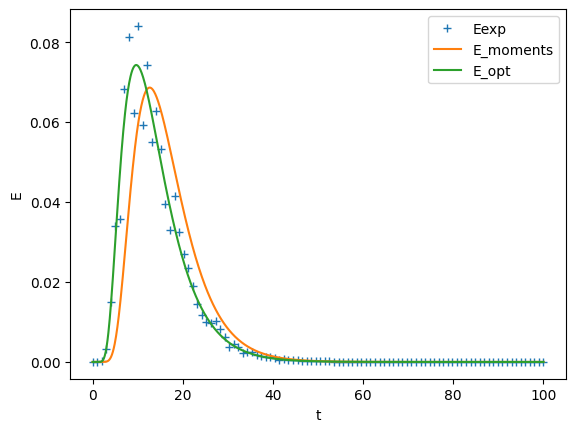

In [ ]:
from scipy.optimize import curve_fit
popt, copt = curve_fit(E, texp, Eexp, p0=(10,10))
tau_opt, Pe_opt = popt
print(f"tau={tau_opt:8.3f} s, Pe={Pe_opt:8.3f}")
plot(texp, Eexp, '+', label='Eexp')
t=linspace(0.0001,100,1000)
E_moments = E(t, tau_exp, Pe_exp)
E_opt = E(t, tau_opt, Pe_opt)
plot(t, E_moments, label='E_moments')
plot(t, E_opt, label='E_opt')
xlabel('t')
ylabel('E')
legend()
show()

Now that the parameters $\tau$ and $Pe$ from the experiment are measured we can use their definition to compute some characteristics of the transport phenomena of reactants in the reactor.

11. Pour une longueur de réacteur $L=1$ m, déduisez la valeur de la vitesse d'écoulement moyenne $U$.


In [ ]:
L=1
U = L/tau
print(f"U={U} m/s")

Le nombre de Péclet peut être exprimé ici comme
$$Pe=\frac{UL}{D},$$
où $D$ est appelé coefficient de diffusion ($m^2/s$) est est une constante représentant l'intensité du mouvement aléatoire des réactifs dans l'écoulement.

12. Déduisez-en la valeur du coefficient de diffusion D.

In [ ]:
D = U*L/Pe
print(f"D={D:8.3f} m2/s")

La troisième méthode pour déterminer un modèle est de calculer la transformée de Laplace de la fonction $E_\text{exp}(t)$ définie par
$$\tilde E_\text{exp}(s)=\int_{t=0}^\infty E(t) e^{—st}dt,$$
puis de comparer cette fonction au modèle théorique suivant :
$$\tilde E(s)=\exp\left[\frac{Pe}{2}\left(1-\sqrt{1+\frac{4s\tau}{Pe}}\right)\right]$$
pour identifier $\tau$ et $Pe$.

13. Calculez la transformée de Laplace $\tilde E_\text{exp}(s)$ pour 1000 valeurs de $s$ comprises entre 0 et 1, puis tracez cette fonction.

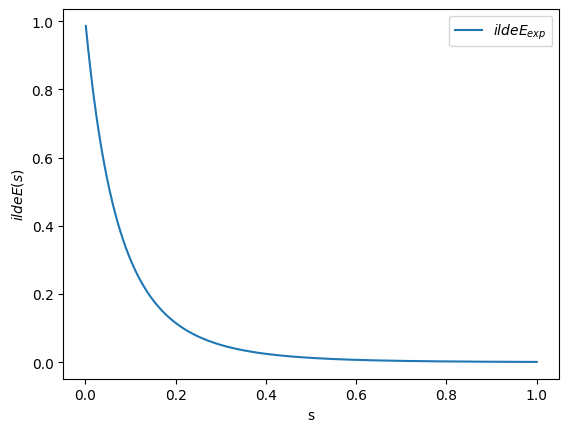

In [ ]:
s = linspace(0.001, 1, 1000)
Etilde_exp = 0*s
for i in range(len(s)):
  Etilde_exp[i] = simpson(Eexp*exp(-s[i]*texp), texp)
plot(s, Etilde_exp, label='$\tilde E_{exp}$')
xlabel('s')
ylabel('$\tilde E(s)$')
legend()

14. Définissez une fonction Etilde(s, tau, Pe) retournant la valeur du modèle théorique.

In [ ]:
def Etilde(s, tau, Pe):
  return exp(Pe/2*(1-sqrt(1+4*s*tau/Pe)))


15. Ajustez le modèle Etilde de manière à déterminer les valeurs de tau et Pe qui permettent de bien représenter la fonction expérimentale $\tilde E_\text{exp}(s)$. Vous appellerez ces valeurs tau_opt_lap et Pe_opt_lap. Tracez les fonctions $\tilde E_\text{exp}(s)$ et Etilde(s, tau_opt_lap, Pe_opt_lap) sur un même graphe. Enfin, sur ce même graphe, ajoutez les tracés du modèle Etilde basé sur les valeurs de tau et Pe déterminées par les 2 premières méthodes, c'est à dire Etilde(s, tau_exp,Pe_exp) et Etilde(s, tau_opt,Pe_opt). Concluez sur la précision et la difficulté à mettre en plac eces différents modèles.

tau=  10.993 s, Pe=   7.864


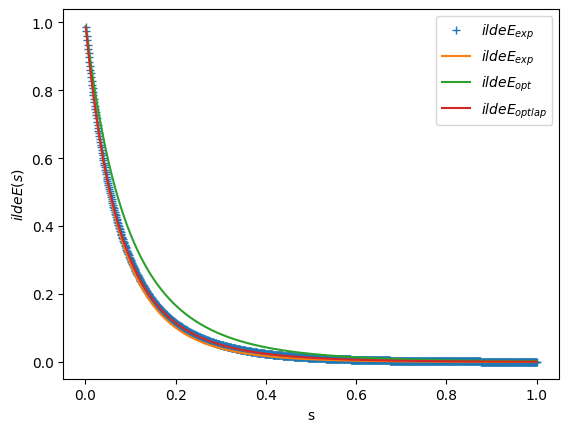

In [ ]:
popt, copt = curve_fit(Etilde, s, Etilde_exp, p0=(10,10))
tau_opt_lap, Pe_opt_lap = popt
print(f"tau={tau_opt:8.3f} s, Pe={Pe_opt:8.3f}")
plot(s, Etilde_exp, '+', label='$\tilde E_{exp}$')
plot(s, Etilde(s, tau_exp, Pe_exp), label='$\tilde E_{exp}$')
plot(s, Etilde(s, tau_opt, Pe_opt), label='$\tilde E_{opt}$')
plot(s, Etilde(s, tau_opt_lap, Pe_opt_lap), label='$\tilde E_{opt lap}$')
xlabel('s')
ylabel('$\tilde E(s)$')
legend()

16. Tracez maintenant la donnée expérimentale $E_\text{exp}(t)$ ainsi que les modèles déterminés des 3 manières, c'est-à-dire E(t,tau_exp, Pe_exp), E(t, tau_opt, Pe_opt) et que E(t, tau_opt£_lap, Pe_opt_lap). Commentez ces différentes méthodes en termes de complexité et précision.

tau=  10.993 s, Pe=   7.864


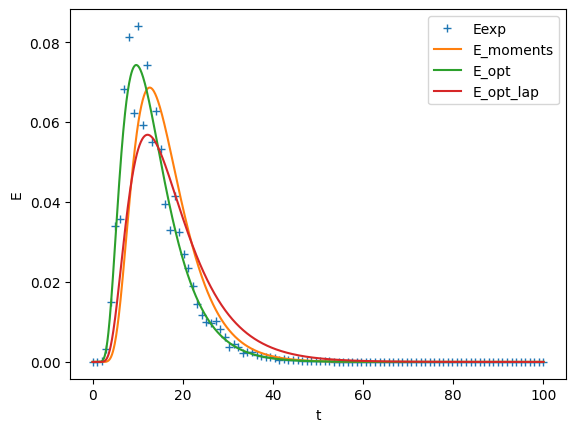

In [ ]:
from scipy.optimize import curve_fit
popt, copt = curve_fit(E, texp, Eexp, p0=(10,10))
tau_opt, Pe_opt = popt
print(f"tau={tau_opt:8.3f} s, Pe={Pe_opt:8.3f}")
plot(texp, Eexp, '+', label='Eexp')
t=linspace(0.0001,100,1000)
E_moments = E(t, tau_exp, Pe_exp)
E_opt = E(t, tau_opt, Pe_opt)
E_opt_lap = E(t, tau_opt_lap, Pe_opt_lap)
plot(t, E_moments, label='E_moments')
plot(t, E_opt, label='E_opt')
plot(t, E_opt_lap, label='E_opt_lap')
xlabel('t')
ylabel('E')
legend()
show()